In [1]:
import numpy as np
from specdb.specdb import SpecDB, IgmSpec
from astropy.io import fits

from funcs_query import query, pmf, identify

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
igmsp = SpecDB('/media/bartosz/USB STICK/BOSS_DR14/IGMspec_DB_v03.1.hdf5')
meta = igmsp['BOSS_DR14'].meta
meta[1]

Database is igmspec
Created on 2019-Mar-06
Version: v03.1


RA_GROUP,DEC_GROUP,THING_ID,PLATE,MJD,FIBERID,Z,Z_ERR,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,BI_CIV,ERR_BI_CIV,RUN_NUMBER,COL_NUMBER,FIELD_NUMBER,PSFFLUX,IVAR_PSFFLUX,PSFMAG,ERR_PSFMAG,MI,GAL_EXT,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP,ORIG_ID,R,zem_GROUP,sig_zem,IGM_ID,NPIX,WV_MIN,WV_MAX,GROUP_ID,EPOCH,SDSS_NAME,SPECTRO,SOURCE_Z,SPECTRO_DUPLICATE,RERUN_NUMBER,OBJ_ID,CC_FLAGS,PH_FLAGS,flag_zem,CAT,DATE-OBS,INSTR,DISPERSER,TELESCOPE,STYPE,SPEC_FILE
float64,float64,int32,int16,int32,int16,float64,float64,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32[51],int32[51],int32[51],float64,float64,int16,int16,int16,float64[5],float64[5],float64[5],float64[5],float64,float64[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,int64,float64,str18,str4,str4,str1[51],str1,str1,str4,str4,str4,str4,str10,str4,str4,str10,str3,str26
0.00238,5.94190,163544156,8740,57367,694,2.1031202999999996,0.0,-1.0,2.1031203269958496,0.0009241577354259787,0,2.0996384999999997,2.0983490000000002,2.0983490000000002,0,0,0,0,2048,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,0.0,0.0,0,0,0,1.1197296380996704 .. 4.730101585388184,9.196866035461426 .. 0.8192309737205505,22.360628128051758 .. 20.78717613220215,0.3101848363876343 .. 0.2420300394296646,-24.732,0.2338263988494873 .. 0.06966802477836609,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.0,0.0,0.0,0.0,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,16.969,0.127,8.5,0.9904,16.887999999999998,0.409,2.700000047683716,1.004,11.861,nan,1.399999976158142,0.9819,8.604,0.127,0.699999988079071,0.9478,0.706171,1.0,1.2885136657753169e-31,2.4790984841010035e-32,1.229889058862803e-31,4.504542253745802e-32,1.496424644649041e-31,4.7290496259357616e-32,2.4598190249290145e-31,5.689571920868372e-32,0,-1.0,-1.0,-1.0,1,2100.0,2.103,0.0009241577354259787,1,4582,3619.9,10394.4,1,2000.0,000000.57+055630.8,BOSS,AUTO,- .. -,-,-,hH00,BCUU,AUTO,DR14,2015-12-11,BOSS,BOTH,SDSS 2.5-M,QSO,spec-8740-57367-0694.fits


In [3]:
fpath = '/media/bartosz/USB STICK/dr16q_prop_May16_2023.fits'

# Open the .fits file
with fits.open(fpath) as hdul:
    # Print information about the file
    hdul.info()

    # Access the data from the primary HDU (header/data unit)
    data1 = hdul[1].data

    # Optionally, you can also access the header
    header1 = hdul[1].header
    print(header1)

Filename: /media/bartosz/USB STICK/dr16q_prop_May16_2023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    236   750414R x 114C   [18A, K, K, K, D, D, 20A, 10A, D, 12A, D, D, D, D, D, 5D, 5D, 2D, 3D, 3D, D, D, 3D, 3D, D, D, D, D, D, D, D, D, D, D, D, D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, D, D, D, D, D, D, D, D, D, D, D, D, 8D, 8D]   
  2                1 BinTableHDU    188   750414R x 90C   [5D, 5D, 5D, E, D, D, D, D, D, D, D, D, J, J, J, 5E, 5D, 5E, 5D, 5E, D, D, I, D, D, D, D, I, D, D, D, D, D, D, D, D, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, I, I, D, D, D, D, D, D, J, D, D, D, J, D, D, D, J, D, 21A, D, D, E, E, D, K, D, D, E, E, E, E, E, E, E, D] 

In [19]:
data1['LOGMBH_MGII']
np.sum(data1['LOGMBH_MGII'] != 0)

474205

In [20]:
len(data1['LOGMBH_MGII'])

750414

In [24]:
data1['Z_FIT']

array([0.84543478, 2.03549147, 1.57422745, ..., 1.23296249, 2.00986481,
       2.375     ])

In [26]:
range = np.logical_and(data1['Z_DR16Q']>2,data1['Z_DR16Q']<3)
np.sum(range==True)

230002

In [27]:
np.sum(data1['LOGMBH_MGII'][range]==0)

229609

In [28]:
229609/230002

0.99829131920592

In [37]:
range = data1['Z_DR16Q']>3
print(np.sum(range==True))
print(np.sum(data1['LOGMBH_MGII'][range]==0))

39551
38728


In [44]:
38728/39551

0.9791914237313848

In [39]:
range = np.logical_and(data1['Z_DR16Q']>1,data1['Z_DR16Q']<2)
print(np.sum(range==True))
print(np.sum(data1['LOGMBH_MGII'][range]==0))

347746
1516


In [40]:
range = data1['Z_DR16Q']<1
print(np.sum(range==True))
print(np.sum(data1['LOGMBH_MGII'][range]==0))

132782
6113


In [43]:
1-1516/347746

0.9956404962242557

In [36]:
my_array = np.array([1, 2, 3, 4, 2, 5, 2, 6, 2])
type(data1['LOGMBH_MGII'])

numpy.ndarray

In [4]:
NN_file = np.loadtxt('/media/bartosz/USB STICK/highz_data/highZ_NN_ext_plclbound.txt', dtype='str')
neighbors = NN_file[:,1:6]
hmeta = np.loadtxt('/media/bartosz/USB STICK/highz_data/meta_data_v2.txt', dtype='str')
z_meta = [float(z) for z in hmeta[:,1]]
snr_meta = [float(s) for s in hmeta[:,2]]

# Exclude:
exc = ['J1535+1943','PSOJ215.1514-16.0417','ULASJ0148+0600','ULASJ1207+0630','VIKJ2318-3029','PSOJ183-12']

NAMES = NN_file[:,0]
NAMES_v2, nn_list = [], []
HNAME, HZ, HSNR, NNID, NND = [], [], [], [], []
SDSSNAME, Z_SYS, MBH_CIV, MBH_CIV_ERR, MBH_MGII, MBH_MGII_ERR, MBH_HB, MBH_HB_ERR = [], [], [], [], [], [], [], []
LOGLEDD, LOGLEDD_ERR, LOGLBOL, LOGLBOL_ERR = [],[],[],[]
for j, n in enumerate(NAMES):
    if n in exc:
        print(n, '- skipped')
        continue

    NAMES_v2.append(n)
    nn_list.append(neighbors[j])
    hz = z_meta[j]
    hsnr = snr_meta[j]
    qlist = [int(o) for o in NN_file[:,1:6][j]]
    ndist = [float(d) for d in NN_file[:,6:][j]]
    for i,q in enumerate(qlist):
        wu_id = query(meta,data1,q)
        if type(wu_id) == np.int64:
            sdssname = data1[wu_id]['SDSS_NAME']
            z_sys = data1[wu_id]['Z_SYS']
            mbh_civ = data1[wu_id]['LOGMBH_CIV']
            mbh_civ_err = data1[wu_id]['LOGMBH_CIV_ERR']
            mbh_mgii = data1[wu_id]['LOGMBH_MGII']
            mbh_mgii_err = data1[wu_id]['LOGMBH_MGII_ERR']
            mbh_hb = data1[wu_id]['LOGMBH_HB']
            mbh_hb_err = data1[wu_id]['LOGMBH_HB_ERR']
            edd = data1[wu_id]['LOGLEDD_RATIO']
            edd_err = data1[wu_id]['LOGLEDD_RATIO_ERR']
            loglbol = data1[wu_id]['LOGLBOL']
            loglbol_err = data1[wu_id]['LOGLBOL_ERR']
        # elif type(wu_id) == np.ndarray:
        #     mbh = [data1[m]['LOGMBH_CIV'] for m in wu_id]
        elif wu_id == None:
            sdssname = '-'
            z_sys = 0
            mbh_civ = 0
            mbh_civ_err = 0
            mbh_mgii = 0
            mbh_mgii_err = 0
            mbh_hb = 0
            mbh_hb_err = 0
            edd = 0
            edd_err = 0
            loglbol = 0
            loglbol_err = 0
        HNAME.append(n)
        HZ.append(hz)
        HSNR.append(hsnr)
        NNID.append(q)
        NND.append(ndist[i])
        SDSSNAME.append(sdssname)
        Z_SYS.append(z_sys)
        MBH_CIV.append(mbh_civ)
        MBH_CIV_ERR.append(mbh_civ_err)
        MBH_MGII.append(mbh_mgii)
        MBH_MGII_ERR.append(mbh_mgii_err)
        MBH_HB.append(mbh_hb)
        MBH_HB_ERR.append(mbh_hb_err)
        LOGLBOL.append(loglbol)
        LOGLBOL_ERR.append(loglbol_err)
        LOGLEDD.append(edd)
        LOGLEDD_ERR.append(edd_err)

Could not find object for given coordinates.
ULASJ0148+0600 - skipped
PSOJ215.1514-16.0417 - skipped
ULASJ1207+0630 - skipped
VIKJ2318-3029 - skipped
Could not find object for given coordinates.
PSOJ183-12 - skipped
J1535+1943 - skipped


In [5]:
civ_errors_csv = np.loadtxt('/home/bartosz/Downloads/highz sample redshifts - MBH CIV errors.csv',delimiter=',')
civ_errors_plus = civ_errors_csv[:,0]
civ_errors_minus = civ_errors_csv[:,1]

mgii_errors_csv = np.loadtxt('/home/bartosz/Downloads/highz sample redshifts - MBH MgII errors.csv',delimiter=',')
mgii_errors_plus = mgii_errors_csv[:,0]
mgii_errors_minus = mgii_errors_csv[:,1]

edd_ratios = np.loadtxt('/home/bartosz/Downloads/highz sample redshifts - Edd ratios.csv',delimiter=',')
civ_edd = edd_ratios[:,0]
civ_edd_plus = edd_ratios[:,1]
civ_edd_minus = edd_ratios[:,2]

mgii_edd = edd_ratios[:,3]
mgii_edd_plus = edd_ratios[:,4]
mgii_edd_minus = edd_ratios[:,5]

len(HNAME)/5

34.0

In [6]:
HMBH_MGII = [9.37,9.3,9.43,10.09,9.76,9.59,9.11,9.27,9.29,9.53,0,0,9.77,0,0,8.81,9.14,9.68,9.42,9.02,0,8.69,9.18,9.51,9.09,9,9.41,9.34,9.02,9.19,9.31,9.34,8.92,9.2]
HMBH_CIV = [9.51,9.47,9.55,9.82,9.55,10.15,9.28,9.45,9.5,9.28,0,0,9.41,0,8.77,8.63,8.82,9.14,9.32,8.77,0,0,9.5,9.61,9.74,9.23,9.29,9.45,9.54,9.29,9.52,9.58,9.26,9.39]

CIV_HMBH, CIV_PLUS, CIV_MINUS = [], [], []
MGII_HMBH, MGII_PLUS, MGII_MINUS = [], [], []
EDD_CIV, EDD_CIV_PLUS, EDD_CIV_MINUS, EDD_MGII, EDD_MGII_PLUS, EDD_MGII_MINUS = [],[],[],[],[],[]
for j, n in enumerate(NAMES_v2):
    if n in exc:
        print(n, '- skipped')
        continue
    qlist = [int(o) for o in nn_list[j]]
    for i,q in enumerate(qlist):
        CIV_HMBH.append(HMBH_CIV[j])
        CIV_PLUS.append(civ_errors_plus[j])
        CIV_MINUS.append(civ_errors_minus[j])

        MGII_HMBH.append(HMBH_MGII[j])
        MGII_PLUS.append(mgii_errors_plus[j])
        MGII_MINUS.append(mgii_errors_minus[j])

        EDD_CIV.append(civ_edd[j])
        EDD_CIV_PLUS.append(civ_edd_plus[j])
        EDD_CIV_MINUS.append(civ_edd_minus[j])
        EDD_MGII.append(mgii_edd[j])
        EDD_MGII_PLUS.append(mgii_edd_plus[j])
        EDD_MGII_MINUS.append(mgii_edd_minus[j])

col1 = fits.Column(name='NAME', format='22A', array=HNAME)
col2 = fits.Column(name='Z', format='D', array=HZ)
col3 = fits.Column(name='SNR', format='D', array=HSNR)
col31 = fits.Column(name='MBH_CIV_XS', format='D', array=CIV_HMBH)
col32 = fits.Column(name='MBH_CIV_XS_plus', format='D', array=CIV_PLUS)
col33 = fits.Column(name='MBH_CIV_XS_minus', format='D', array=CIV_MINUS)
col34 = fits.Column(name='MBH_MGII_XS', format='D', array=MGII_HMBH)
col35 = fits.Column(name='MBH_MGII_XS_plus', format='D', array=MGII_PLUS)
col36 = fits.Column(name='MBH_MGII_XS_minus', format='D', array=MGII_MINUS)
col37 = fits.Column(name='EDD_CIV_XS', format='D', array=EDD_CIV)
col38 = fits.Column(name='EDD_CIV_XS_plus', format='D', array=EDD_CIV_PLUS)
col39 = fits.Column(name='EDD_CIV_XS_minus', format='D', array=EDD_CIV_MINUS)
col40 = fits.Column(name='EDD_MGII_XS', format='D', array=EDD_MGII)
col41 = fits.Column(name='EDD_MGII_XS_plus', format='D', array=EDD_MGII_PLUS)
col42 = fits.Column(name='EDD_MGII_XS_minus', format='D', array=EDD_MGII_MINUS)
col4 = fits.Column(name='NN_ID', format='K', array=NNID)
col5 = fits.Column(name='NN_D', format='D', array=NND)
col6 = fits.Column(name='SDSS_NAME', format='18A', array=SDSSNAME)
col7 = fits.Column(name='Z_SYS', format='D', array=Z_SYS)
col8 = fits.Column(name='MBH_CIV', format='D', array=MBH_CIV)
col9 = fits.Column(name='MBH_CIV_ERR', format='D', array=MBH_CIV_ERR)
col10 = fits.Column(name='MBH_MGII', format='D', array=MBH_MGII)
col11 = fits.Column(name='MBH_MGII_ERR', format='D', array=MBH_MGII_ERR)
col12 = fits.Column(name='MBH_HB', format='D', array=MBH_HB)
col13 = fits.Column(name='MBH_HB_ERR', format='D', array=MBH_HB_ERR)
col1400 = fits.Column(name='LOGLBOL', format='D', array=LOGLBOL)
col1401 = fits.Column(name='LOGLBOL_ERR', format='D', array=LOGLBOL_ERR)
col140 = fits.Column(name='LOGLEDD_RATIO', format='D', array=LOGLEDD)
col141 = fits.Column(name='LOGLEDD_RATIO_ERR', format='D', array=LOGLEDD_ERR)

cols = fits.ColDefs([col1, col2, col3, col31, col32, col33, col34, col35, col36, col37, col38, col39, 
                     col40, col41, col42, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13, col1400, col1401, col140, col141])

hdu = fits.BinTableHDU.from_columns(cols)

hdu.writeto('/media/bartosz/USB STICK/highz_data/nn_properties.fits', overwrite=True)

In [2]:
with fits.open('/media/bartosz/USB STICK/highz_data/nn_properties.fits') as hdul:
    hdul.info()
    header = hdul[1].header
    print(header)
    data = hdul[1].data

print(data['LOGLBOL'])

Filename: /media/bartosz/USB STICK/highz_data/nn_properties.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     66   170R x 29C   [22A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, 18A, D, D, D, D, D, D, D, D, D, D, D]   
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  256 / length of dimension 1                          NAXIS2  =                  170 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                   29 / number of table fields                         TTYPE1  = 'NAME    '            

/tmp/ipykernel_6112/4240165889.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(d['NN_D'],diff, c=colors[k], marker=marker)#,alpha=alpha)#,'ro')


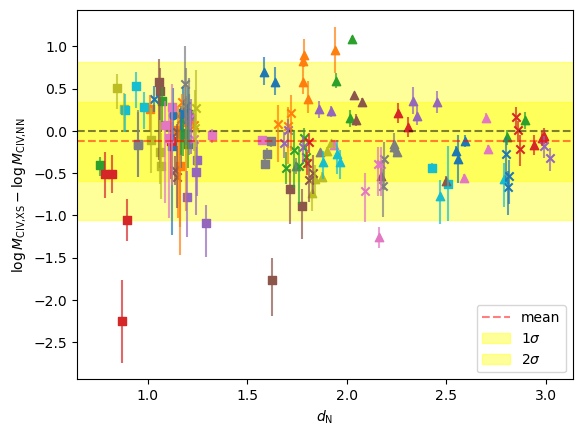

In [100]:
mask1 = data['MBH_CIV_XS'] != 0
mask2 = data['MBH_CIV'] != 0
mask = np.logical_and(mask1,mask2)
data1 = data[mask]

cmap = plt.get_cmap('tab10')
colors = cmap(range(10))
#markers = ['o']*10 + ['s']*10 + ['^']*10 + ['x']*10 # + ['*']*5
markers = ['o', 's', '^', 'x', '*']
alphas = [1,0.9,0.7,0.6,0.5]
j=0
k=0
l=0

fig = plt.figure()
plt.axhline(0,c='black',ls='--',alpha=0.5)
someX, someY = 2, 5
# currentAxis = plt.gca()
# currentAxis.add_patch(Rectangle((0.8,-1.3), 2.2, 2.2, facecolor="white", edgecolor='black'))
DIFF=[]
for i, d in enumerate(data1):
    marker=markers[j]
    alpha=alphas[l]
    l+=1
    plus = np.sqrt(d['MBH_CIV_ERR']**2+d['MBH_CIV_XS_plus']**2)
    minus = np.sqrt(d['MBH_CIV_ERR']**2+d['MBH_CIV_XS_minus']**2)
    diff = d['MBH_CIV']-d['MBH_CIV_XS']
    plt.scatter(d['NN_D'],diff, c=colors[k], marker=marker)#,alpha=alpha)#,'ro')
    plt.errorbar(d['NN_D'],diff, yerr=[[minus],[plus]], color=colors[k],alpha=0.7)#, fmt='o', capsize=5, label='Error Bars')
    # plt.errorbar(d['NN_D'],diff, c=colors[k])#, fmt='o', capsize=5, label='Error Bars')
    DIFF.append(diff)
    if i % 5 == 0:
        k+=1
        l=0
    if i % 50 == 0:        
        j+=1
        k=0

plt.axhline(np.mean(DIFF),c='red',ls='--',alpha=0.5,label='mean')
plt.axhspan(np.mean(DIFF)-np.std(DIFF),np.mean(DIFF)+np.std(DIFF),color='yellow',alpha=0.4,zorder=0,label=r'$1\sigma$')
plt.axhspan(np.mean(DIFF)-2*np.std(DIFF),np.mean(DIFF)+2*np.std(DIFF),color='yellow',alpha=0.4,zorder=0,label=r'$2\sigma$')
#plt.scatter(data1['NN_D'],data1['MBH_CIV']/data1['MBH'], c=colors, marker=markers)#,'ro')
#plt.ylim(0.7,1.2)
# plt.ylim(-2.55,1.2)
# plt.xlim(0.55,3.1)
#plt.plot([0,10],[0,10],ls='-')
plt.ylabel(r'$\log M_\text{CIV,XS} - \log M_\text{CIV,NN}$')
plt.xlabel(r'$d_\text{N}$')
plt.legend()
plt.savefig('plots/MBH_dN.png', format='png')
plt.show()
plt.close()

/tmp/ipykernel_6112/2653245417.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(d['NN_D'],diff, c=colors[k], marker=marker)#,alpha=alpha)#,'ro')


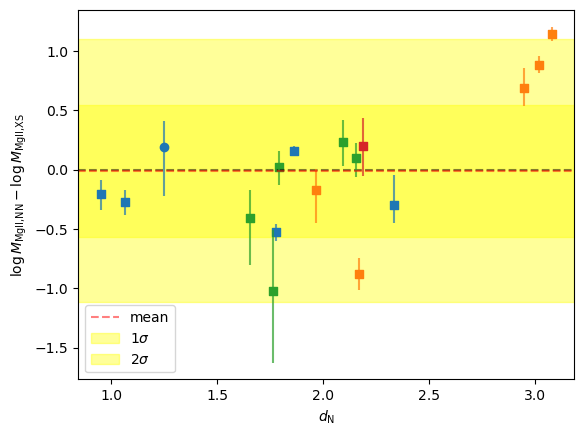

In [101]:
mask1 = data['MBH_MGII_XS'] != 0
mask2 = data['MBH_MGII'] != 0
mask = np.logical_and(mask1,mask2)
data12 = data[mask]
cmap = plt.get_cmap('tab10')

colors = cmap(range(10))
#markers = ['o']*10 + ['s']*10 + ['^']*10 + ['x']*10 # + ['*']*5
markers = ['o', 's', '^', 'x', '*']
alphas = [1,0.9,0.7,0.6,0.5]
j=0
k=0
l=0

fig = plt.figure()
plt.axhline(0,c='black',ls='--',alpha=0.5)
# someX, someY = 2, 5
# currentAxis = plt.gca()
# currentAxis.add_patch(Rectangle((0.8,-1.3), 2.2, 2.2, facecolor="white", edgecolor='black'))
DIFF=[]
for i, d in enumerate(data12):
    marker=markers[j]
    alpha=alphas[l]
    l+=1
    #print(d['MBH_CIV_ERR'])
    plus = np.sqrt(d['MBH_MGII_ERR']**2+d['MBH_MGII_XS_plus']**2)
    minus = np.sqrt(d['MBH_MGII_ERR']**2+d['MBH_MGII_XS_minus']**2)
    diff = d['MBH_MGII']-d['MBH_MGII_XS']
    plt.scatter(d['NN_D'],diff, c=colors[k], marker=marker)#,alpha=alpha)#,'ro')
    plt.errorbar(d['NN_D'],diff, yerr=[[minus],[plus]], c=colors[k],alpha=0.7)#, fmt='o', capsize=5, label='Error Bars')
    # plt.errorbar(d['NN_D'],d['MBH_MGII']-d['MBH_MGII_XS'], c=colors[k])#, fmt='o', capsize=5, label='Error Bars')
    DIFF.append(diff)
    if i % 5 == 0:
        k+=1
        l=0
    if i % 50 == 0:        
        j+=1
        k=0

plt.axhline(np.mean(DIFF),c='red',ls='--',alpha=0.5,label='mean')
plt.axhspan(np.mean(DIFF)-np.std(DIFF),np.mean(DIFF)+np.std(DIFF),color='yellow',alpha=0.4,zorder=0,label=r'$1\sigma$')
plt.axhspan(np.mean(DIFF)-2*np.std(DIFF),np.mean(DIFF)+2*np.std(DIFF),color='yellow',alpha=0.4,zorder=0,label=r'$2\sigma$')
#plt.scatter(data1['NN_D'],data1['MBH_CIV']/data1['MBH'], c=colors, marker=markers)#,'ro')
#plt.ylim(0.7,1.2)
# plt.ylim(-2,2)
# plt.xlim(0.55,6.05)
#plt.plot([0,10],[0,10],ls='-')
plt.ylabel(r'$\log M_\text{MgII,NN} - \log M_\text{MgII,XS}$')
plt.xlabel(r'$d_\text{N}$')
plt.legend()
plt.savefig('plots/MBH_MGII_dN.png', format='png')
plt.show()
plt.close()

/tmp/ipykernel_6112/3715446200.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS'], c=colors[k], marker=marker)#,alpha=alpha)#,'ro')


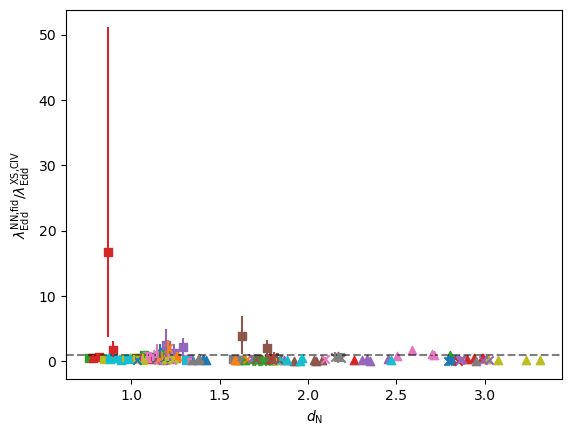

/tmp/ipykernel_6112/3715446200.py:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS'], c=colors[k], marker=marker)#,alpha=alpha)#,'ro')


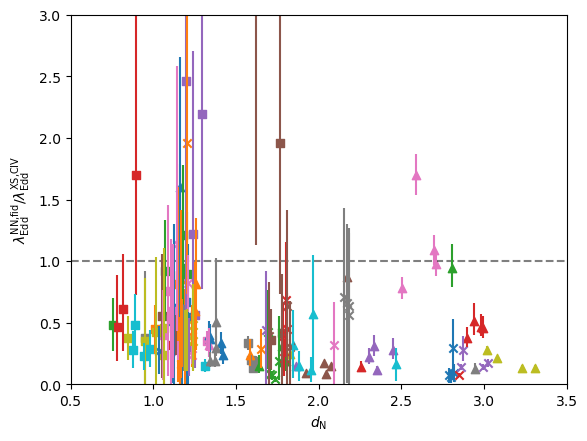

In [81]:
mask1 = data['EDD_CIV_XS'] != -1
mask2 = data['LOGLEDD_RATIO'] != 0
mask = np.logical_and(mask1,mask2)
dataEDD = data[mask1]
cmap = plt.get_cmap('tab10')

colors = cmap(range(10))
#markers = ['o']*10 + ['s']*10 + ['^']*10 + ['x']*10 # + ['*']*5
markers = ['o', 's', '^', 'x', '*']
alphas = [1,0.9,0.7,0.6,0.5]
j=0
k=0
l=0

fig = plt.figure()
plt.axhline(1,c='black',ls='--',alpha=0.5)
someX, someY = 2, 5
# currentAxis = plt.gca()
# currentAxis.add_patch(Rectangle((0.8,-1.3), 2.2, 2.2, facecolor="white", edgecolor='black'))
for i, d in enumerate(dataEDD):
    marker=markers[j]
    alpha=alphas[l]
    l+=1
    #print(d['MBH_CIV_ERR'])
    plus = np.sqrt((10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS']*(10**d['LOGLEDD_RATIO_ERR']-1))**2+
                   (10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS']**2*d['EDD_CIV_XS_plus'])**2)
    minus = np.sqrt((10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS']*(10**(-d['LOGLEDD_RATIO_ERR'])-1))**2+
                   (10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS']**2*d['EDD_CIV_XS_minus'])**2)
    plt.scatter(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS'], c=colors[k], marker=marker)#,alpha=alpha)#,'ro')
    plt.errorbar(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS'], yerr=[[minus],[plus]], c=colors[k])#, fmt='o', capsize=5, label='Error Bars')
    # plt.errorbar(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS'], c=colors[k])#, fmt='o', capsize=5, label='Error Bars')
    if i % 5 == 0:
        k+=1
        l=0
    if i % 50 == 0:        
        j+=1
        k=0

# plt.ylim(-11,15)
# plt.xlim(0.55,6.05)
#plt.plot([0,10],[0,10],ls='-')
plt.ylabel(r'$\lambda_\text{Edd}^\text{NN,fid} / \lambda_\text{Edd}^\text{XS,CIV}$')
plt.xlabel(r'$d_\text{N}$')
# plt.savefig('plots/EDD_RATIO_civ_dN.png', format='png')
plt.show()
plt.close()


j,k,l=0,0,0
fig = plt.figure()
plt.axhline(1,c='black',ls='--',alpha=0.5)
for i, d in enumerate(dataEDD):
    marker=markers[j]
    alpha=alphas[l]
    l+=1
    plus = np.sqrt((10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS']*(10**d['LOGLEDD_RATIO_ERR']-1))**2+
                   (10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS']**2*d['EDD_CIV_XS_plus'])**2)
    minus = np.sqrt((10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS']*(10**(-d['LOGLEDD_RATIO_ERR'])-1))**2+
                   (10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS']**2*d['EDD_CIV_XS_minus'])**2)
    plt.scatter(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS'], c=colors[k], marker=marker)#,alpha=alpha)#,'ro')
    plt.errorbar(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS'], yerr=[[minus],[plus]], c=colors[k])#, fmt='o', capsize=5, label='Error Bars')
    # plt.errorbar(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_CIV_XS'], c=colors[k])#, fmt='o', capsize=5, label='Error Bars')
    if i % 5 == 0:
        k+=1
        l=0
    if i % 50 == 0:        
        j+=1
        k=0

plt.ylim(0,3)
plt.xlim(0.5,3.5)
plt.ylabel(r'$\lambda_\text{Edd}^\text{NN,fid} / \lambda_\text{Edd}^\text{XS,CIV}$')
plt.xlabel(r'$d_\text{N}$')
# plt.savefig('plots/EDD_RATIO_civ_dN_zoom.png', format='png')
plt.show()
plt.close()

/tmp/ipykernel_6112/80466385.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS'], c=colors[k], marker=marker)#,alpha=alpha)#,'ro')


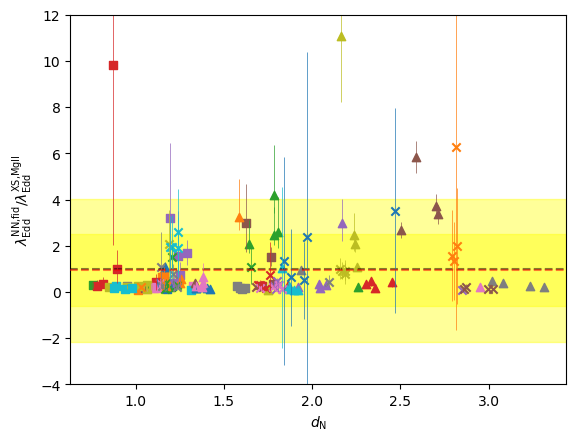

/tmp/ipykernel_6112/80466385.py:68: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS'], c=colors[k], marker=marker)#,alpha=alpha)#,'ro')


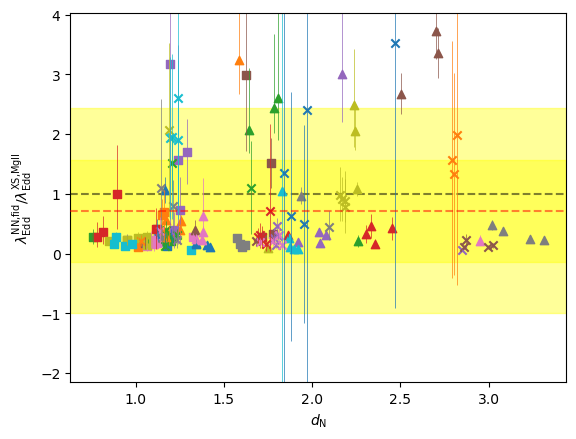

In [109]:
mask1 = data['EDD_MGII_XS'] != -1
mask2 = data['LOGLEDD_RATIO'] != 0
mask = np.logical_and(mask1,mask2)
dataEDD = data[mask1]
cmap = plt.get_cmap('tab10')

colors = cmap(range(10))
#markers = ['o']*10 + ['s']*10 + ['^']*10 + ['x']*10 # + ['*']*5
markers = ['o', 's', '^', 'x', '*']
alphas = [1,0.9,0.7,0.6,0.5]
j=0
k=0
l=0

fig = plt.figure()
plt.axhline(1,c='black',ls='--',alpha=0.5)
someX, someY = 2, 5
# currentAxis = plt.gca()
# currentAxis.add_patch(Rectangle((0.8,-1.3), 2.2, 2.2, facecolor="white", edgecolor='black'))
RATIO=[]
for i, d in enumerate(dataEDD):
    marker=markers[j]
    alpha=alphas[l]
    l+=1    
    ratio = 10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS']
    # if ratio>5:
    #     continue
    plus = np.sqrt((10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS']*(10**d['LOGLEDD_RATIO_ERR']-1))**2+
                   (10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS']**2*d['EDD_MGII_XS_plus'])**2)
    minus = np.sqrt((10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS']*(10**(-d['LOGLEDD_RATIO_ERR'])-1))**2+
               (10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS']**2*d['EDD_MGII_XS_minus'])**2)
    plt.scatter(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS'], c=colors[k], marker=marker)#,alpha=alpha)#,'ro')
    plt.errorbar(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS'], yerr=[[minus],[plus]], c=colors[k], elinewidth=0.5)
    # plt.errorbar(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS'], c=colors[k])#, fmt='o', capsize=5, label='Error Bars')
    RATIO.append(10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS'])
    if i % 5 == 0:
        k+=1
        l=0
    if i % 50 == 0:        
        j+=1
        k=0

plt.axhline(np.mean(RATIO),c='red',ls='--',alpha=0.5,zorder=5)
plt.axhspan(np.mean(RATIO)-np.std(RATIO),np.mean(RATIO)+np.std(RATIO),color='yellow',alpha=0.4,zorder=0)
plt.axhspan(np.mean(RATIO)-2*np.std(RATIO),np.mean(RATIO)+2*np.std(RATIO),color='yellow',alpha=0.4,zorder=0)
plt.ylim(-4,12)
plt.ylabel(r'$\lambda_\text{Edd}^\text{NN,fid} / \lambda_\text{Edd}^\text{XS,MgII}$')
plt.xlabel(r'$d_\text{N}$')
plt.savefig('plots/EDD_RATIO_mgii_dN.png', format='png')
plt.show()
plt.close()

j,k,l=0,0,0
fig = plt.figure()
plt.axhline(1,c='black',ls='--',alpha=0.5,zorder=1)
RATIO2=[]
for i, d in enumerate(dataEDD):
    marker=markers[j]
    alpha=alphas[l]
    l+=1
    ratio = 10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS']
    if RATIO[i]>np.mean(RATIO)+2*np.std(RATIO):
        continue
    plus = np.sqrt((10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS']*(10**d['LOGLEDD_RATIO_ERR']-1))**2+
                   (10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS']**2*d['EDD_MGII_XS_plus'])**2)
    minus = np.sqrt((10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS']*(10**(-d['LOGLEDD_RATIO_ERR'])-1))**2+
               (10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS']**2*d['EDD_MGII_XS_minus'])**2)
    plt.scatter(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS'], c=colors[k], marker=marker)#,alpha=alpha)#,'ro')
    plt.errorbar(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS'], yerr=[[minus],[plus]], c=colors[k], elinewidth=0.5)
    # plt.errorbar(d['NN_D'],10**d['LOGLEDD_RATIO']/d['EDD_MGII_XS'], c=colors[k])#, fmt='o', capsize=5, label='Error Bars')
    RATIO2.append(ratio)
    if i % 5 == 0:
        k+=1
        l=0
    if i % 50 == 0:        
        j+=1
        k=0

plt.axhline(np.mean(RATIO2),c='red',ls='--',alpha=0.5,zorder=5)
plt.axhspan(np.mean(RATIO2)-np.std(RATIO2),np.mean(RATIO2)+np.std(RATIO2),color='yellow',alpha=0.4,zorder=0)
plt.axhspan(np.mean(RATIO2)-2*np.std(RATIO2),np.mean(RATIO2)+2*np.std(RATIO2),color='yellow',alpha=0.4,zorder=0)
plt.ylim(np.mean(RATIO)-2*np.std(RATIO),np.mean(RATIO)+2*np.std(RATIO))
# plt.xlim(0.5,3.5)
plt.ylabel(r'$\lambda_\text{Edd}^\text{NN,fid} / \lambda_\text{Edd}^\text{XS,MgII}$')
plt.xlabel(r'$d_\text{N}$')
plt.savefig('plots/EDD_RATIO_mgii__dN_trim.png', format='png')
plt.show()
plt.close()